In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

heatmap_16384x1024.dat


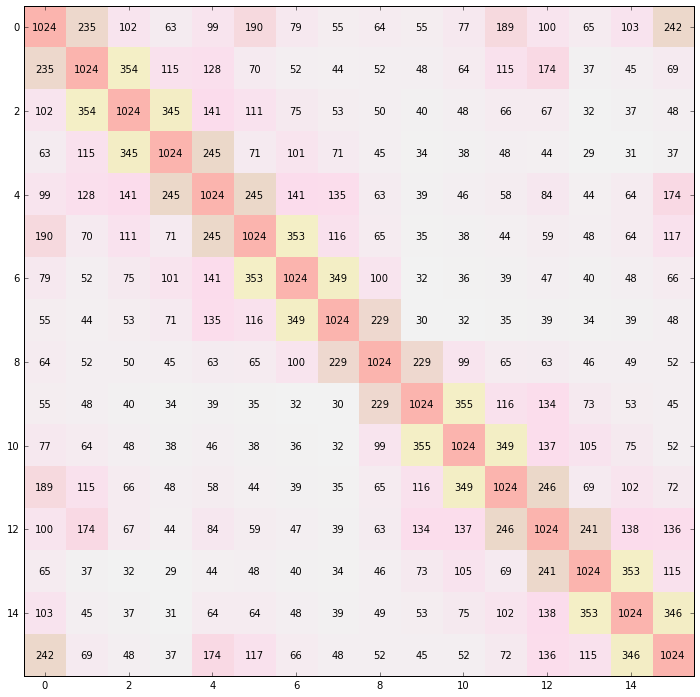

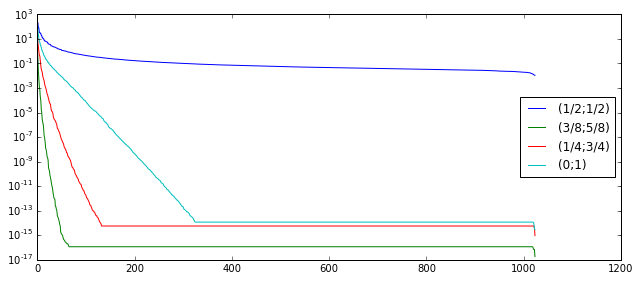

heatmap_16384x128.dat


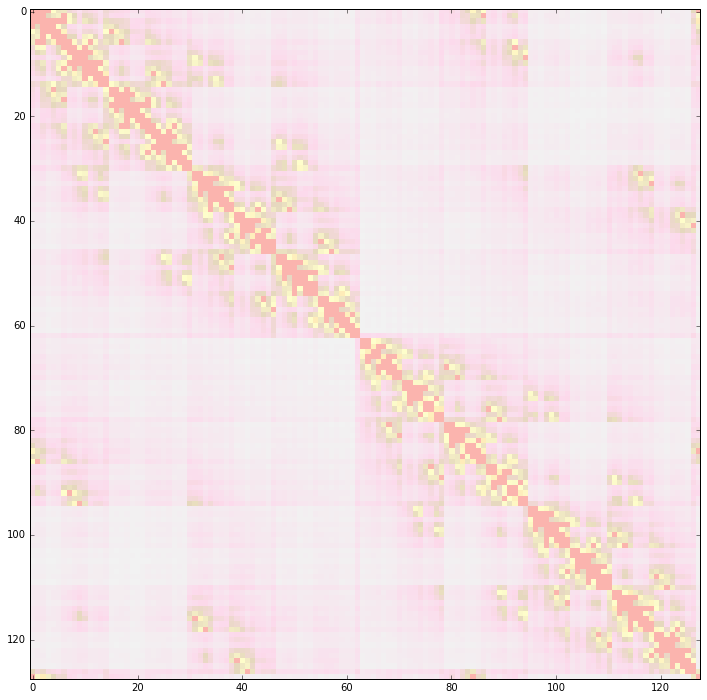

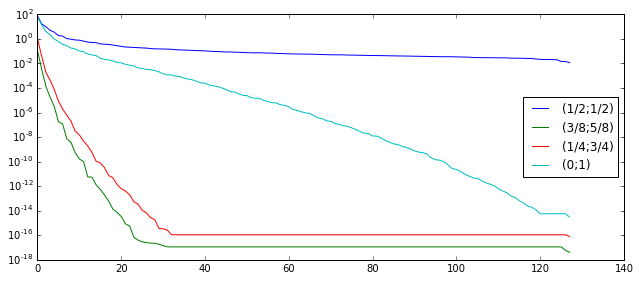

heatmap_16384x256.dat


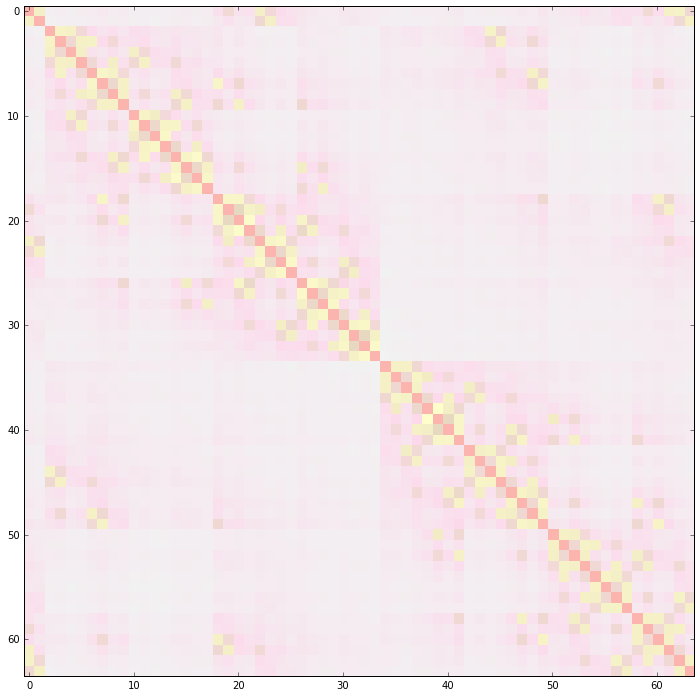

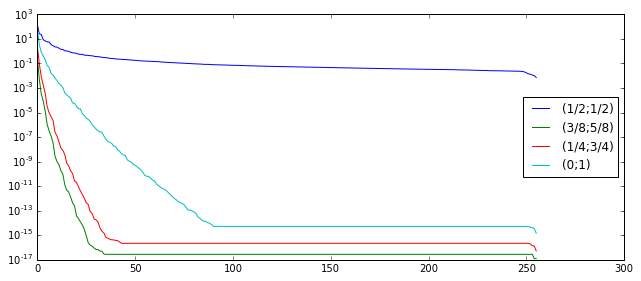

heatmap_16384x512.dat


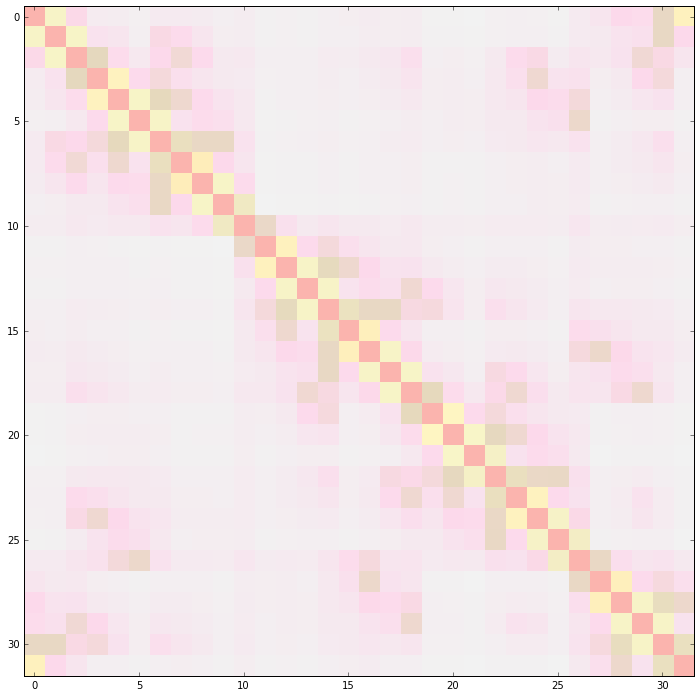

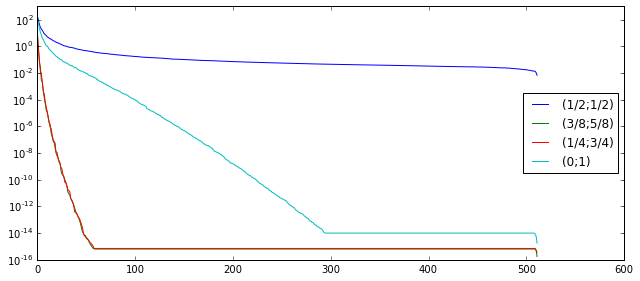

heatmap_16384x64.dat


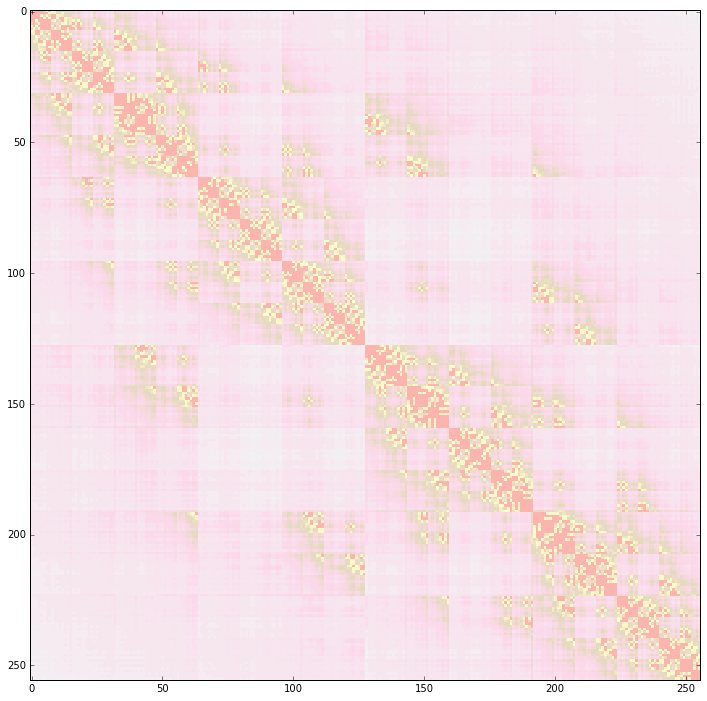

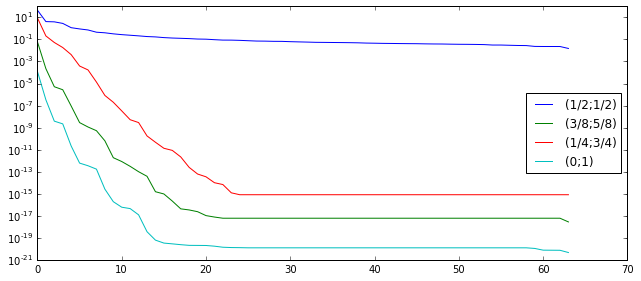

In [3]:
dirname = "spatial_heatmap/"
for fname in os.listdir(dirname):
    if not fname.endswith(".dat"):
        continue
    print fname
    with open(dirname+fname, "r") as fd:
        nrows, ncols = map(int, fd.readline().split())
        mat = np.ndarray((nrows, ncols), dtype=np.int)
        for i in range(nrows):
            line = fd.readline().split()
            for j in range(ncols):
                mat[i, j] = int(line[j])
        S1 = np.array(map(float, fd.readline().split()))
        S2 = np.array(map(float, fd.readline().split()))
        S3 = np.array(map(float, fd.readline().split()))
        S4 = np.array(map(float, fd.readline().split()))
        fig = plt.figure(1, figsize=(12,12))
        plt.imshow(mat, cmap=plt.cm.Pastel1_r, interpolation="nearest")
        if(nrows <= 20):
            for i in range(mat.shape[0]):
                for j in range(mat.shape[1]):
                    plt.text(j, i, "{}".format(mat[i, j]),
                             horizontalalignment='center', verticalalignment='center')
        plt.show()
        plt.savefig(dirname+fname[:-3]+"pdf")
        plt.close()
        fig = plt.figure(1, figsize=(9,4))
        plt.semilogy(S1, label='(1/2;1/2)')
        plt.semilogy(S2, label='(3/8;5/8)')
        plt.semilogy(S3, label='(1/4;3/4)')
        plt.semilogy(S4, label='(0;1)')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
        plt.savefig(dirname+fname[:-4]+"_decay.pdf")
        plt.close()